### Dataset

Bottle (148 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937370-1629951468/bottle.tar.xz

Cable (481 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937413-1629951498/cable.tar.xz

Capsule (385 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz

Carpet (705 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz

Grid (153 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937487-1629951814/grid.tar.xz

Hazelnut (588 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937545-1629951845/hazelnut.tar.xz

Leather (500 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937607-1629951964/leather.tar.xz

Metal Nut (157 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937637-1629952063/metal_nut.tar.xz

Pill (262 MB)
https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz

Screw (186 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938130-1629953152/screw.tar.xz

Tile (335 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xz

Toothbrush (104 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz

Transistor (384 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938166-1629953277/transistor.tar.xz

Wood (474 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938383-1629953354/wood.tar.xz

Zipper (152 MB)
https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938385-1629953449/zipper.tar.xz

# 데이터셋 다운로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# # MVTec 데이터 다운로드
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937370-1629951468/bottle.tar.xz
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xz
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938130-1629953152/screw.tar.xz
# !wget https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz
# !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz

# # # MVTec 데이터 다운로드
# # !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938134-1629953256/toothbrush.tar.xz
# # !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937370-1629951468/bottle.tar.xz
# # !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938133-1629953189/tile.tar.xz
# # !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938130-1629953152/screw.tar.xz
# # !wget https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz
# # !wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz

# # 압축 해제
# !for file in *.tar.xz; do tar -xf "$file" && rm "$file"; done

In [3]:
pwd

'/content'

In [4]:
ls

drive/  sample_data/


In [5]:
# 필요한 라이브러리 임포트
import os
import glob
import natsort
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# 기본 설정
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [7]:
# 이미지 크기 설정
IMAGE_SIZE = 256

In [8]:
# 데이터 경로 설정 (로컬)
BASE_PATH = "/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD"

In [9]:
def get_image_paths(category):
    """카테고리별 이미지와 마스크 경로 반환"""
    # 정상 이미지
    good_paths = natsort.natsorted(glob.glob(os.path.join(BASE_PATH, f"{category}/train/good/*")))
    good_paths.extend(natsort.natsorted(glob.glob(os.path.join(BASE_PATH, f"{category}/test/good/*"))))

    # 비정상 이미지와 마스크
    defect_paths = []
    mask_paths = []

    try:
        defect_types = [d for d in os.listdir(os.path.join(BASE_PATH, f"{category}/test"))
                       if d != 'good' and os.path.isdir(os.path.join(BASE_PATH, f"{category}/test/{d}"))]

        for defect in defect_types:
            defect_paths.append(natsort.natsorted(glob.glob(os.path.join(BASE_PATH, f"{category}/test/{defect}/*"))))
            mask_paths.append(natsort.natsorted(glob.glob(os.path.join(BASE_PATH, f"{category}/ground_truth/{defect}/*"))))

        print(f"\nCategory: {category}")
        print(f"Normal images: {len(good_paths)}")
        print(f"Defect images: {len(defect_paths)}")
        print(f"Defect types: {defect_types}")

    except Exception as e:
        print(f"Error processing category {category}: {str(e)}")
        return [], [], []

    return good_paths, defect_paths, mask_paths

In [10]:
from torchvision.transforms import Normalize
import albumentations as A
from albumentations.pytorch import ToTensorV2

class MVTecDataset(Dataset):
    def __init__(self, image_paths, mask_paths, mask_class, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.mask_class = mask_class
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # 이미지 로드 및 전처리
        image = Image.open(self.image_paths[idx]).convert('RGB')
        mask = Image.open(self.mask_paths[idx]).convert('L')

        image = np.array(image)
        mask = np.array(mask)
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

            tmp_zero = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 26))
            tmp_zero[:, : , self.mask_class[idx]] = mask

            mask = tmp_zero
            image = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image.float())

            # mask = (mask > 0).unsqueeze(0).float()
            mask = torch.from_numpy(mask)
            mask = (mask > 0).float()

        # # 마스크 생성/로드 및 전처리
        # if self.mask_paths is None or self.mask_paths[idx] is None:
        #     # 정상 이미지의 경우: 모든 픽셀이 0인 마스크 생성
        #     mask = torch.zeros((1, IMAGE_SIZE, IMAGE_SIZE))
        # else:
        #     # 비정상 이미지의 경우: 실제 마스크 로드
        #     mask = Image.open(self.mask_paths[idx]).convert('L')
        #     mask = mask.resize((IMAGE_SIZE, IMAGE_SIZE), Image.NEAREST)
        #     mask = np.array(mask)
        #     mask = (mask > 0).astype(np.float32)
        #     mask = torch.from_numpy(mask).unsqueeze(0)

        return image, mask

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [11]:
# 데이터 변환 정의
transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    ToTensorV2()
])

test_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    ToTensorV2()
])


# # 데이터 변환 정의
# train_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

In [12]:
# 모든 카테고리에 대한 경로 수집
categories = ['bottle', 'capsule', 'pill', 'screw', 'tile', 'toothbrush']
all_good_paths = []
all_defect_paths = []
all_mask_paths = []

for category in categories:
    good, defect, mask = get_image_paths(category)
    all_good_paths.extend(good)
    all_defect_paths.extend(defect)
    all_mask_paths.extend(mask)

print(f"\nTotal Dataset Summary:")
print(f"Total good images: {len(all_good_paths)}")
print(f"Total defect images: {len(all_defect_paths)}")
print(f"Total mask images: {len(all_mask_paths)}")


Category: bottle
Normal images: 229
Defect images: 3
Defect types: ['contamination', 'broken_small', 'broken_large']

Category: capsule
Normal images: 242
Defect images: 5
Defect types: ['poke', 'scratch', 'squeeze', 'faulty_imprint', 'crack']

Category: pill
Normal images: 293
Defect images: 7
Defect types: ['scratch', 'color', 'faulty_imprint', 'crack', 'pill_type', 'combined', 'contamination']

Category: screw
Normal images: 361
Defect images: 5
Defect types: ['manipulated_front', 'thread_side', 'thread_top', 'scratch_neck', 'scratch_head']

Category: tile
Normal images: 263
Defect images: 5
Defect types: ['gray_stroke', 'rough', 'crack', 'glue_strip', 'oil']

Category: toothbrush
Normal images: 72
Defect images: 1
Defect types: ['defective']

Total Dataset Summary:
Total good images: 1460
Total defect images: 26
Total mask images: 26


In [13]:
# 데이터셋 시각화 함수
def visualize_dataset_samples(dataset, num_samples=5, title="Dataset Samples"):
    num_samples = min(num_samples, len(dataset))  # 데이터셋 크기 초과 방지
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5))
    fig.suptitle(title, fontsize=16)

    for i in range(num_samples):
        image, mask = dataset[i]

        mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)  # (C, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)    # (C, 1, 1)
        image =  (image * std) + mean

        # # 이미지 역정규화
        image = image.numpy().transpose(1, 2, 0).astype(np.uint8)
        # image = np.clip(image, 0, 1)

        # 시각화
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f'Image {i+1}')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(mask.squeeze(), cmap='gray')
        axes[i, 1].set_title(f'Mask {i+1}')
        axes[i, 1].axis('off')

    # 레이아웃 조정
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 서브플롯 간 간격 확보
    plt.show()


In [14]:
print(len(all_defect_paths))

26


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

# 전체 이미지 경로와 마스크 경로 리스트 만들기
image_paths = []
mask_paths = []
labels = []

# 각 클래스별 이미지 경로 및 마스크 경로를 리스트에 추가
for i, class_paths in enumerate(all_defect_paths):
    image_paths.extend(class_paths)  # 이미지 경로 리스트 확장
    mask_paths.extend(all_mask_paths[i])  # 마스크 경로 리스트 확장
    labels.extend([i] * len(class_paths))  # 해당 클래스의 레이블 추가

# Step 1: train (60%) / remaining (40%)으로 split
X_train_defect, remaining_image_paths, y_train_mask, remaining_mask_paths, y_train_labels, remaining_labels = train_test_split(
    image_paths, mask_paths, labels, test_size=0.4, stratify=labels, random_state=42
)

# Step 2: remaining (40%)을 다시 val (50%) / test (50%)로 split
X_val_defect, X_test_defect, y_val_mask, y_test_mask, y_val_labels, y_test_labels = train_test_split(
    remaining_image_paths, remaining_mask_paths, remaining_labels, test_size=0.5, stratify=remaining_labels, random_state=42
)

# 결과 확인
print("Train dataset size:", len(X_train_defect), len(y_train_mask), len(y_train_labels))
print("Validation dataset size:", len(X_val_defect), len(y_val_mask), len(y_val_labels))
print("Test dataset size:", len(X_test_defect), len(y_test_mask), len(y_test_labels))


# # Train/Val/Test 분할
# X_train_good, X_temp_good = train_test_split(all_good_paths, test_size=0.3, random_state=SEED)
# X_val_good, X_test_good = train_test_split(X_temp_good, test_size=0.5, random_state=SEED)

# X_train_defect, X_temp_defect, y_train_mask, y_temp_mask = train_test_split(
#     all_defect_paths, all_mask_paths, test_size=0.3, random_state=SEED
# )

# X_val_defect, X_test_defect, y_val_mask, y_test_mask = train_test_split(
#     X_temp_defect, y_temp_mask, test_size=0.5, random_state=SEED
# )

Train dataset size: 327 327 327
Validation dataset size: 109 109 109
Test dataset size: 110 110 110


In [16]:

print(X_train_defect)
print(y_train_mask)

['/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/screw/test/scratch_head/019.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/capsule/test/crack/013.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/pill/test/crack/025.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/pill/test/contamination/020.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/pill/test/scratch/018.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/pill/test/faulty_imprint/002.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/capsule/test/crack/011.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/screw/test/scratch_head/004.png', '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/MVTec_AD/pill/test/scratch/011.png', '/

In [17]:
# Dataset 생성
train_dataset = MVTecDataset(
    X_train_defect,
    y_train_mask,
    y_train_labels,
    transform=transform
)

val_dataset = MVTecDataset(
    X_val_defect,
    y_val_mask,
    y_val_labels,
    transform=test_transform
)

test_dataset = MVTecDataset(
    X_test_defect,
    y_test_mask,
    y_test_labels,
    transform=transform
)

# # Dataset 생성
# train_dataset = MVTecDataset(
#     X_train_defect,
#     y_train_mask,
#     transform=train_transform
# )

# val_dataset = MVTecDataset(
#     X_val_defect,
#     y_val_mask,
#     transform=test_transform
# )

# test_dataset = MVTecDataset(
#     X_test_defect,
#     y_test_mask,
#     transform=test_transform
# )

In [18]:
# # 데이터셋 샘플 시각화
# print("\nVisualizing training dataset samples:")
# visualize_dataset_samples(train_dataset, num_samples=5, title="Training Dataset Samples")

# print("\nVisualizing validation dataset samples:")
# visualize_dataset_samples(val_dataset, num_samples=5, title="Validation Dataset Samples")

# # print("\nVisualizing test dataset samples:")
# visualize_dataset_samples(test_dataset, num_samples=5, title="Test Dataset Samples")

In [19]:
# DataLoader 생성
batch_size = 16

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True if torch.cuda.is_available() else False
)

print("\nDataLoader 크기:")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


DataLoader 크기:
Training batches: 21
Validation batches: 7
Test batches: 7


In [20]:
# 모델 구조 정의
class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ASPP, self).__init__()

        # 1x1 convolution
        self.conv1 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        # dilated convolutions
        self.conv2 = nn.Conv2d(in_channels, out_channels, 3, padding=6, dilation=6, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(in_channels, out_channels, 3, padding=12, dilation=12, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.conv4 = nn.Conv2d(in_channels, out_channels, 3, padding=18, dilation=18, bias=False)
        self.bn4 = nn.BatchNorm2d(out_channels)

        # global average pooling
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        self.bn5 = nn.BatchNorm2d(out_channels)

        # final 1x1 convolution
        self.conv6 = nn.Conv2d(out_channels * 5, out_channels, 1)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        size = x.size()[2:]

        # parallel branches
        out1 = F.relu(self.bn1(self.conv1(x)))
        out2 = F.relu(self.bn2(self.conv2(x)))
        out3 = F.relu(self.bn3(self.conv3(x)))
        out4 = F.relu(self.bn4(self.conv4(x)))

        # global average pooling branch
        out5 = self.avg_pool(x)
        out5 = F.relu(self.bn5(self.conv5(out5)))
        out5 = F.interpolate(out5, size=size, mode='bilinear', align_corners=False)

        # concatenate all branches
        out = torch.cat([out1, out2, out3, out4, out5], dim=1)
        out = self.conv6(out)
        out = self.dropout(out)

        return out

class DeepLabV3Plus(nn.Module):
    def __init__(self):
        super(DeepLabV3Plus, self).__init__()

        # ResNet backbone with updated initialization
        resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
        self.layer0 = nn.Sequential(
            resnet.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool
        )
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4

        # ASPP
        self.aspp = ASPP(2048, 256)

        # Low-level features conv
        self.low_level_conv = nn.Sequential(
            nn.Conv2d(256, 48, 1, bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU()
        )

        # Final convolutions
        self.final_conv = nn.Sequential(
            nn.Conv2d(304, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 26, 1)  # 26 channel output for 26 classes
        )

    def forward(self, x):
        # Encoder
        x = self.layer0(x)  # 1/4
        low_level_feat = self.layer1(x)  # 1/4
        x = self.layer2(low_level_feat)  # 1/8
        x = self.layer3(x)  # 1/16
        x = self.layer4(x)  # 1/32

        # ASPP
        x = self.aspp(x)

        # Decoder
        x = F.interpolate(x, size=low_level_feat.shape[2:], mode='bilinear', align_corners=False)
        low_level_feat = self.low_level_conv(low_level_feat)

        x = torch.cat([x, low_level_feat], dim=1)
        x = self.final_conv(x)

        # Final upsampling
        x = F.interpolate(x, scale_factor=4, mode='bilinear', align_corners=False)

        return x

In [21]:
# 손실 함수 정의
class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, outputs, targets):
        # BCE Loss
        bce = self.bce_loss(outputs, targets)

        # Dice Loss
        probs = torch.sigmoid(outputs)
        numerator = 2 * (probs * targets).sum(dim=(2,3))
        denominator = (probs + targets).sum(dim=(2,3))
        dice_loss = 1 - (numerator + 1) / (denominator + 1)
        dice_loss = dice_loss.mean()

        # Combined loss
        return self.alpha * bce + (1 - self.alpha) * dice_loss

In [22]:
# 평가 메트릭
def calculate_metrics(outputs, targets, threshold=0.5):
    probs = torch.sigmoid(outputs)
    preds = (probs >= threshold).float()

    # IoU
    intersection = (preds * targets).sum(dim=(2,3))
    union = (preds + targets).clamp(0, 1).sum(dim=(2,3))
    iou = (intersection + 1e-6) / (union + 1e-6)

    # Dice coefficient
    dice = 2 * intersection / (preds.sum(dim=(2,3)) + targets.sum(dim=(2,3)) + 1e-6)

    return iou.mean().item(), dice.mean().item()

In [23]:
# 학습 진행상황 시각화 함수
def plot_training_progress(train_losses, val_losses, train_metrics, val_metrics, save_path=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Loss plot
    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_title('Loss Progress')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # IoU plot
    ax2.plot([m[0] for m in train_metrics], label='Train IoU')
    ax2.plot([m[0] for m in val_metrics], label='Validation IoU')
    ax2.set_title('IoU Progress')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('IoU')
    ax2.legend()

    # Dice plot
    ax3.plot([m[1] for m in train_metrics], label='Train Dice')
    ax3.plot([m[1] for m in val_metrics], label='Validation Dice')
    ax3.set_title('Dice Coefficient Progress')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Dice')
    ax3.legend()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [24]:
# 모델 초기화
model = DeepLabV3Plus().to(device)
criterion = CombinedLoss(alpha=0.5)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5, patience=5, verbose=True)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 194MB/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Validation: 100%|██████████| 7/7 [01:03<00:00,  9.05s/it]



Epoch 1/100:
Train Loss: 0.7960, IoU: 0.0826, Dice: 0.0021
Val Loss: 0.8091, IoU: 0.2662, Dice: 0.0015


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]



Epoch 2/100:
Train Loss: 0.7343, IoU: 0.6372, Dice: 0.0002
Val Loss: 0.7225, IoU: 0.7684, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]



Epoch 3/100:
Train Loss: 0.7002, IoU: 0.8078, Dice: 0.0000
Val Loss: 0.6960, IoU: 0.8785, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]



Epoch 4/100:
Train Loss: 0.6711, IoU: 0.8937, Dice: 0.0000
Val Loss: 0.6641, IoU: 0.9410, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]



Epoch 5/100:
Train Loss: 0.6472, IoU: 0.9242, Dice: 0.0000
Val Loss: 0.6393, IoU: 0.9595, Dice: 0.0000


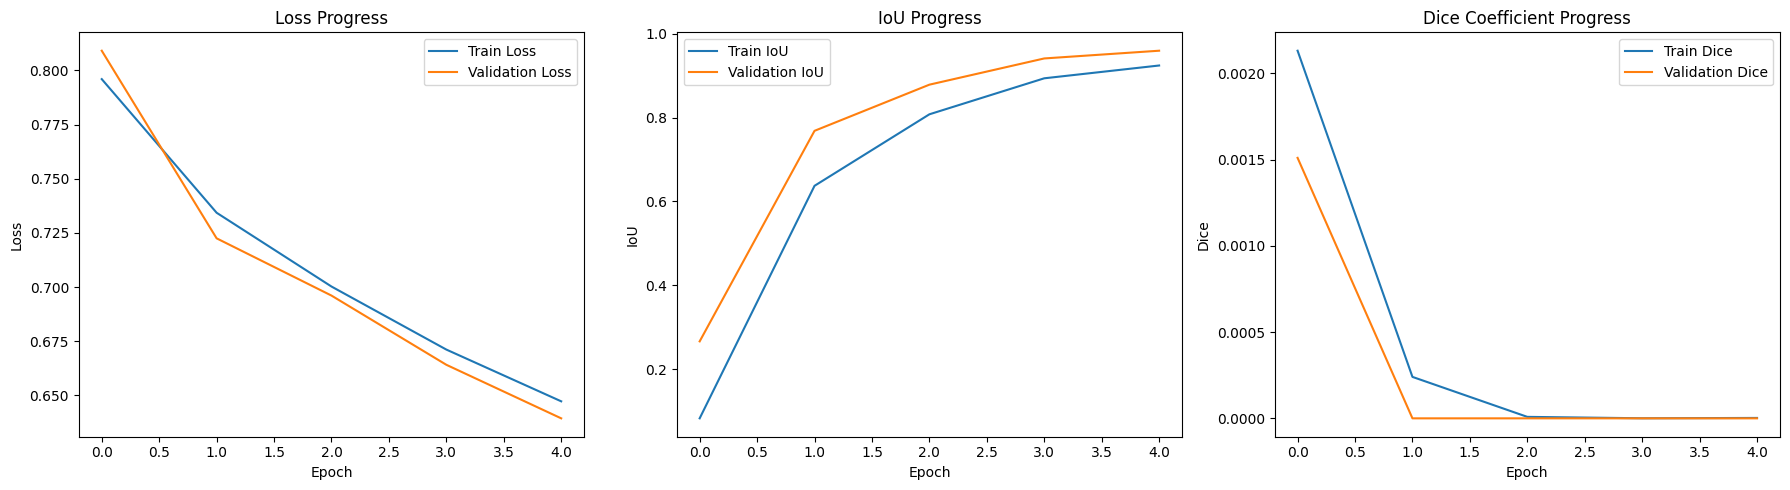

Validation: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]



Epoch 6/100:
Train Loss: 0.6241, IoU: 0.9372, Dice: 0.0000
Val Loss: 0.6186, IoU: 0.9424, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]



Epoch 7/100:
Train Loss: 0.6075, IoU: 0.9441, Dice: 0.0000
Val Loss: 0.6048, IoU: 0.9523, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]



Epoch 8/100:
Train Loss: 0.5930, IoU: 0.9501, Dice: 0.0000
Val Loss: 0.5859, IoU: 0.9446, Dice: 0.0000


Validation: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]



Epoch 9/100:
Train Loss: 0.5784, IoU: 0.9531, Dice: 0.0000
Val Loss: 0.5793, IoU: 0.9615, Dice: 0.0000


Epoch 10/100 - Training:  14%|█▍        | 3/21 [00:04<00:25,  1.39s/it]

In [ ]:
# 학습 파라미터
num_epochs = 100
best_val_loss = float('inf')

# 학습 진행상황 저장용 리스트
train_losses = []
val_losses = []
train_metrics = []
val_metrics = []

# 학습 루프
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    train_iou = 0
    train_dice = 0

    for images, masks in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        masks = masks.permute(0, 3, 2, 1)
        loss = criterion(outputs, masks)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        iou, dice = calculate_metrics(outputs.detach(), masks)
        train_iou += iou
        train_dice += dice

    train_loss /= len(train_loader)
    train_iou /= len(train_loader)
    train_dice /= len(train_loader)

    train_losses.append(train_loss)
    train_metrics.append((train_iou, train_dice))

    # Validation
    model.eval()
    val_loss = 0
    val_iou = 0
    val_dice = 0

    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc='Validation'):
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            masks = masks.permute(0, 3, 2, 1)

            loss = criterion(outputs, masks)

            val_loss += loss.item()
            iou, dice = calculate_metrics(outputs, masks)
            val_iou += iou
            val_dice += dice

    val_loss /= len(val_loader)
    val_iou /= len(val_loader)
    val_dice /= len(val_loader)

    val_losses.append(val_loss)
    val_metrics.append((val_iou, val_dice))

    # Learning rate scheduling
    scheduler.step(val_loss)

    # 모델 저장
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss,
        }, 'best_model.pth')

    # 결과 출력
    print(f'\nEpoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, IoU: {train_iou:.4f}, Dice: {train_dice:.4f}')
    print(f'Val Loss: {val_loss:.4f}, IoU: {val_iou:.4f}, Dice: {val_dice:.4f}')

    # 5 에포크마다 학습 진행상황 시각화
    if (epoch + 1) % 5 == 0:
        plot_training_progress(train_losses, val_losses, train_metrics, val_metrics,
                             save_path=f'training_progress_epoch_{epoch+1}.png')


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/deeplabv3+_class_26_model_state_dict.pth')

from google.colab import runtime
runtime.unassign()

In [ ]:

model.load_state_dict(torch.load('/content/drive/MyDrive/like_lion/Computer_Vision/Segmentation_Project/deeplabv3+_class_26_model_state_dict.pth'))
model.eval()  # 평가 모드로 설정

<ipython-input-21-b05b62a14a4b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/like_lion/Computer_Vision/Segmentat

DeepLabV3Plus(
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, ker

In [ ]:
# 최종 학습 진행상황 시각화
plot_training_progress(train_losses, val_losses, train_metrics, val_metrics,
                      save_path='final_training_progress.png')

In [ ]:
# 테스트셋 평가
print("\nEvaluating on test set...")

model.eval()

test_loss = 0
test_iou = 0
test_dice = 0

with torch.no_grad():
    for images, masks in tqdm(test_loader, desc='Testing'):
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        masks = masks.permute(0, 3, 2, 1)

        loss = criterion(outputs, masks)

        test_loss += loss.item()
        iou, dice = calculate_metrics(outputs, masks)
        test_iou += iou
        test_dice += dice

test_loss /= len(test_loader)
test_iou /= len(test_loader)
test_dice /= len(test_loader)

print('\nTest Results:')
print(f'Loss: {test_loss:.4f}')
print(f'IoU: {test_iou:.4f}')
print(f'Dice: {test_dice:.4f}')

In [ ]:
def visualize_predictions(model, test_loader, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))
    fig.suptitle('Test Results', fontsize=16)

    with torch.no_grad():
        for i, (images, masks) in enumerate(test_loader):
            if i >= num_samples:
                break
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)



            mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)  # (C, 1, 1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)   # (C, 1, 1)
            image =  (images[0].cpu() * std) + mean

            # # 이미지 역정규화
            image = image.numpy().transpose(1, 2, 0).astype(np.uint8)

            # # CPU로 이동 및 numpy 변환
            # image = images[0].cpu().numpy().transpose(1,2,0)
            # image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            # image = image.astype(np.uint8)
            # image = np.clip(image, 0, 1)

            mask = masks[0].cpu().numpy()[:, :, y_test_labels[16*i]]
            prob = probs[0].permute(2, 1, 0).cpu().numpy()


            pred = np.argmax(prob, axis=-1)


            axes[i, 0].imshow(image)
            axes[i, 0].set_title('Input Image')
            axes[i, 0].axis('off')

            axes[i, 1].imshow(mask, cmap='gray')
            axes[i, 1].set_title('Ground Truth')
            axes[i, 1].axis('off')

            axes[i, 2].imshow(pred, cmap='gray')
            axes[i, 2].set_title('Prediction')
            axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig('test_predictions.png')
    plt.show()

# 테스트셋 예측 결과 시각화
visualize_predictions(model, test_loader, num_samples=5)


만약 각 클래스별로 segmentation을 하기 위해서는??

### 1. 데이터셋 클래스 수정
```
class MVTecDataset(Dataset):
    def __init__(self, image_paths, mask_paths=None, transform=None, num_classes=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform
        self.num_classes = num_classes
        # 클래스별 인덱스 매핑 생성
        self.class_to_idx = {
            'bottle': 0, 'capsule': 1, 'pill': 2,
            'screw': 3, 'tile': 4, 'toothbrush': 5
        }
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # 이미지 로드 및 전처리
        image = Image.open(self.image_paths[idx]).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        # 마스크 생성/로드 및 전처리
        if self.mask_paths is None or self.mask_paths[idx] is None:
            # 정상 이미지의 경우: 모든 픽셀이 0인 마스크 생성
            mask = torch.zeros((self.num_classes, IMAGE_SIZE, IMAGE_SIZE))
        else:
            # 비정상 이미지의 경우: 실제 마스크 로드
            mask = Image.open(self.mask_paths[idx]).convert('L')
            mask = mask.resize((IMAGE_SIZE, IMAGE_SIZE), Image.NEAREST)
            mask = np.array(mask)
            mask = (mask > 0).astype(np.float32)
            
            # 클래스별 마스크 생성
            class_name = os.path.dirname(self.image_paths[idx]).split('/')[-2]
            class_idx = self.class_to_idx[class_name]
            
            multi_class_mask = torch.zeros((self.num_classes, IMAGE_SIZE, IMAGE_SIZE))
            multi_class_mask[class_idx] = torch.from_numpy(mask)
            mask = multi_class_mask
            
        return image, mask

```

### 2. 모델 수정 (DeepLabV3Plus의 출력 채널 수정)

```
class DeepLabV3Plus(nn.Module):
    def __init__(self, num_classes):
        super(DeepLabV3Plus, self).__init__()
        
        # ... (이전 코드와 동일)
        
        # Final convolutions 수정
        self.final_conv = nn.Sequential(
            nn.Conv2d(304, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, num_classes, 1)  # num_classes 채널 출력
        )
```

### 3. 손실 함수 수정

```
class MultiClassSegmentationLoss(nn.Module):
    def __init__(self, num_classes):
        super(MultiClassSegmentationLoss, self).__init__()
        self.num_classes = num_classes
        self.ce_loss = nn.CrossEntropyLoss()
        
    def forward(self, outputs, targets):
        # Cross Entropy Loss
        ce = self.ce_loss(outputs, targets.argmax(dim=1))
        
        # Multi-class Dice Loss
        probs = F.softmax(outputs, dim=1)
        dice_loss = 0
        
        for i in range(self.num_classes):
            numerator = 2 * (probs[:, i] * targets[:, i]).sum(dim=(1,2))
            denominator = probs[:, i].sum(dim=(1,2)) + targets[:, i].sum(dim=(1,2))
            dice_coef = (numerator + 1e-6) / (denominator + 1e-6)
            dice_loss += (1 - dice_coef.mean())
            
        dice_loss /= self.num_classes
        
        return 0.5 * ce + 0.5 * dice_loss
```

### 4. 평가 메트릭 수정

```
def calculate_multiclass_metrics(outputs, targets, num_classes):
    probs = F.softmax(outputs, dim=1)
    preds = probs.argmax(dim=1)
    target_classes = targets.argmax(dim=1)
    
    iou_scores = []
    dice_scores = []
    
    for i in range(num_classes):
        pred_mask = (preds == i)
        target_mask = (target_classes == i)
        
        # IoU
        intersection = (pred_mask & target_mask).float().sum((1,2))
        union = (pred_mask | target_mask).float().sum((1,2))
        iou = (intersection + 1e-6) / (union + 1e-6)
        iou_scores.append(iou.mean().item())
        
        # Dice
        dice = 2 * intersection / (pred_mask.float().sum((1,2)) + target_mask.float().sum((1,2)) + 1e-6)
        dice_scores.append(dice.mean().item())
    
    return iou_scores, dice_scores
```

### 5. 학습 코드 수정

```
num_classes = 6  # 클래스 수 지정
model = DeepLabV3Plus(num_classes=num_classes).to(device)
criterion = MultiClassSegmentationLoss(num_classes=num_classes)

# 학습 루프에서
for epoch in range(num_epochs):
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # ... (나머지 학습 코드)
        
        iou_scores, dice_scores = calculate_multiclass_metrics(outputs.detach(), masks, num_classes)
        
        # 클래스별 성능 출력
        for i in range(num_classes):
            print(f"Class {i} - IoU: {iou_scores[i]:.4f}, Dice: {dice_scores[i]:.4f}")
```

### 6. 결과 시각화 수정
```
def visualize_multiclass_predictions(model, test_loader, num_classes, class_names, num_samples=5):
    model.eval()
    colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, num_classes))
    
    with torch.no_grad():
        for i, (images, masks) in enumerate(test_loader):
            if i >= num_samples:
                break
                
            images = images.to(device)
            outputs = model(images)
            preds = F.softmax(outputs, dim=1).argmax(dim=1)
            
            # 시각화
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            
            # 원본 이미지
            img = images[0].cpu().numpy().transpose(1,2,0)
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            axes[0].imshow(np.clip(img, 0, 1))
            
            # 실제 마스크
            mask_vis = np.zeros((*masks[0,0].shape, 4))
            for c in range(num_classes):
                mask_vis[masks[0,c].cpu().numpy() > 0] = colors[c]
            axes[1].imshow(mask_vis)
            
            # 예측 마스크
            pred_vis = np.zeros((*preds[0].shape, 4))
            for c in range(num_classes):
                pred_vis[preds[0].cpu().numpy() == c] = colors[c]
            axes[2].imshow(pred_vis)
            
            plt.show()
```